# Subiectul 1

In [62]:
import arviz as az
import pandas as pd
import numpy as np
import pymc as pm

ModuleNotFoundError: No module named 'pymc'

In [34]:
# a.

data_frame = pd.read_csv("BostonHousing.csv")

data_frame

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [19]:
# b. 

with pm.Model() as model:
    
    # Definirea coeficienților
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta_rm = pm.Normal('beta_rm', mu=0, sigma=10)
    beta_crim = pm.Normal('beta_crim', mu=0, sigma=10)
    beta_indus = pm.Normal('beta_indus', mu=0, sigma=10)

    # Modelul liniar
    mu = alpha + beta_rm * df['rm'] + beta_crim * df['crim'] + beta_indus * df['indus']

    # Definirea distribuției normale pentru variabila dependentă
    sigma = pm.HalfCauchy('sigma', beta=10)
    medv = pm.Normal('medv', mu=mu, sigma=sigma, observed=df['medv'])

    # Sampling
    trace = pm.sample(2000, tune=1000, cores=1)

NameError: name 'pm' is not defined

In [58]:
# c.

# Estimarea intervalului HDI al parametrilor
summary = az.summary(trace, hdi_prob=0.95)
print(summary)

NameError: name 'trace' is not defined

In [36]:
# d. 

# Simularea extragerilor din distribuția predictivă posterioară și calculul intervalului de predicție de 50% HDI pentru valoarea locuințelor
with model:
    post_pred = pm.sample_posterior_predictive(trace)

ppc_hdi = az.hdi(post_pred['medv'], hdi_prob=0.5)
print("Intervalul de predicție de 50% HDI pentru valoarea locuințelor:", ppc_hdi)

NameError: name 'model' is not defined

# Subiectul 2

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Parametrii distribuției beta
h = 4  # Numărul de "stema"
t = 0  # Numărul de "pajura"
n = h + t + 1  # Numărul total de aruncări

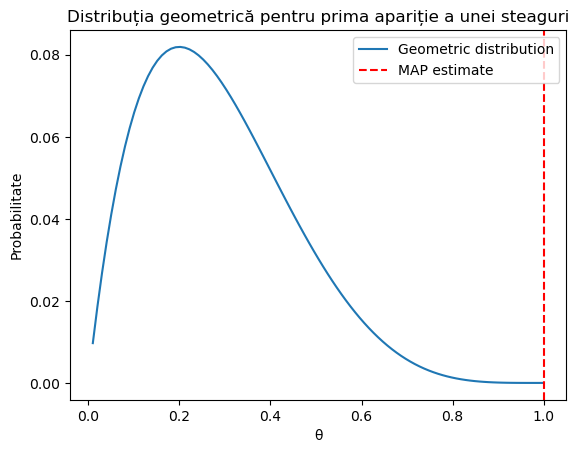

In [53]:
# a.

# Grid computing pentru distribuția geometrică
x = np.linspace(0, 1, 100)
plt.plot(x, stats.geom.pmf(n, x), label='Geometric distribution')
plt.axvline(theta_map, color='red', linestyle='--', label='MAP estimate')
plt.legend(loc='upper right')
plt.title('Distribuția geometrică pentru prima apariție a unei steaguri')
plt.xlabel('θ')
plt.ylabel('Probabilitate')
plt.show()

In [55]:
# b.

# Estimările a priori
alpha = 1
beta = 1

# Distribuția a priori
prior = stats.beta(alpha, beta)

# Distribuția a posteriori
posterior = stats.beta(h + 1, t + 1)

# Calculăm θ care maximizează probabilitatea a posteriori
theta_map = (h + 1 - 1) / (n + 1 - 2)

# Afisare θ care maximizează probabilitatea a posteriori (estimativ)
print("θ care maximizează probabilitatea a posteriori (estimativ):", theta_map)

θ care maximizează probabilitatea a posteriori (estimativ): 1.0
